
# P2I7: Mini Projet 1 - Gaz Parfaits - Code D - Piston


## Prénom Nom - Groupe - Date :

16/03/2023 SAMAIN Luc G93 G274


## Compression par un piston

Cette dernière section consiste à appliquer un déplacement à l'un des murs de la boîte (par exemple ici le mur supérieur) au cours de la simulation, et à observer l'évolution de la température et de la pression dans la boîte au cours de ce déplacement. On s'appuie bien sûr sur le code de la section précédente. La modification principale est l'ajout d'une variable Vymax, qui est la vitesse (descendante ou ascendante) du mur supérieur. La quantité Ymax est donc désormais variable dans le temps ! La première cellule charge les bibliothèques :

In [1]:
#libraries à importer
from matplotlib import pyplot as plt        #librairie d'affichage
import numpy as np
from matplotlib import animation
from matplotlib.patches import Rectangle

## Etape 1

Reprendre le script utilisé dans l'étapes 1 du notebook "Boite". Ajouter la variable Vymax. Initialiser des listes pour le périmetre et le volume de la boite, puisque ces valeurs sont maintenant variables et qu'on en aura besoin après exécution.

In [2]:
t0 = 0 # (s)
tf = 300 # (s)
dt = 1e-4 # pas de temps
#on a dt=(tf - t0)/N ==> N = (tf - t0)/dt
N = int((tf - t0)/dt)

Vx0 = -0.05 #m.s-1 
Vy0 = -0.1 #m.s-1 
X0 = 0.20 # 10cm 
Y0 = 0.10 # 20cm 

#une boite de 50cm x 50cm: 
Xmin = 0.0
Xmax = 0.5
Ymin = 0.0
Ymax = 0.5

m = 0.01 #masse en kg de 10g 
k = 100 #raideur en N.m-1

#matrice position, vitesse, temps et forces:
T =  np.zeros(N+1)
X = np.zeros(N+1) + X0 #tout à X0 le reste sera remplacer au fur et à mesure de la simulation
Y = np.zeros(N+1) + Y0
Vx = np.zeros(N+1) + Vx0 
Vy = np.zeros(N+1) + Vy0
Fx = np.zeros(N+1) #matrices des efforts respectivement horizontaux et verticaux
Fy =  np.zeros(N+1) 

#Energie potentielle
Ep_x = np.zeros(N+1)
Ep_y = np.zeros(N+1)

#Vitesse de la boite
Vymax = -0.001 #m.s-1

#Perimetre et volume:
perimetre = np.zeros(N+1) + 2*(Xmax-Xmin) + 2*(Ymax-Ymin)
volume = np.zeros(N+1) + (Xmax-Xmin)*(Ymax-Ymin)

Solver = input("Entrer 'euler explicite' ou 'verlet modifié'")

## Etape 2

Dans la boucle principale, mettre à jour à chaque pas de temps la position du mur supérieur en fonction du paramètre Vymax. Stocker dans les vecteurs appropriés la valeur du périmètre et du volume de la boîte à chaque pas de temps.

In [3]:
if Solver == "euler explicite":
    for i in range(1, N+1):
        #Calcul des efforts et des énergies potentielles:
        if X[i-1] < Xmin:
            Fx[i] = -k * (X[i-1]-Xmin)
            Ep_x[i] = 0.5 * k * (X[i-1]-Xmin)**2
        elif X[i-1] > Xmax:
            Fx[i] = -k * (X[i-1]-Xmax)
            Ep_x[i] = 0.5 * k * (X[i-1]-Xmax)**2
        if Y[i-1] < Ymin:
            Fy[i] = -k * (Y[i-1]-Ymin)
            Ep_y[i] = 0.5 * k * (Y[i-1]-Ymin)**2 
        elif Y[i-1] > Ymax:
            Fy[i] = -k * (Y[i-1]-Ymax)
            Ep_y[i] = 0.5 * k * (Y[i-1]-Ymax)**2 
        
        #Mise a jour des positions:
        X[i] = X[i-1] + Vx[i-1]*dt
        Y[i] = Y[i-1] + Vy[i-1]*dt
        
        #Mise à jour temps&vitesses
        T[i] = i * dt #temps 0 = 0, temps 1 = dt, temps 2 = 2dt
        Vx[i] = Vx[i-1] + (Fx[i]/m)*dt # ΣF = m *dv/dt ==> dv/dt = ΣF / m #on néglige le poids...
        Vy[i] = Vy[i-1] + (Fy[i]/m)*dt
        
        #Mise à jour de la boite:
        #On vérifie avant que la boite reste dans des dimensions positives
        if Ymax > 0.2: #si la valeur actuelle de ymax est supérieur à 5 cm
            Ymax += Vymax*dt # V = dx/dt -> dx = V*dt
        else:
            Ymax = 0.2
        perimetre[i] = 2*(Xmax-Xmin) + 2*(Ymax-Ymin)
        volume[i] = (Xmax-Xmin)*(Ymax-Ymin)
        
elif Solver == "verlet modifié":
    for i in range(1, N+1):
        #Calcul des efforts et des énergies potentielles:
        if X[i-1] < Xmin:
            Fx[i] = -k * (X[i-1]-Xmin)
            Ep_x[i] = 0.5 * k * (X[i-1]-Xmin)**2
        elif X[i-1] > Xmax:
            Fx[i] = -k * (X[i-1]-Xmax)
            Ep_x[i] = 0.5 * k * (X[i-1]-Xmax)**2
        if Y[i-1] < Ymin:
            Fy[i] = -k * (Y[i-1]-Ymin)
            Ep_y[i] = 0.5 * k * (Y[i-1]-Ymin)**2 
        elif Y[i-1] > Ymax:
            Fy[i] = -k * (Y[i-1]-Ymax)
            Ep_y[i] = 0.5 * k * (Y[i-1]-Ymax)**2 

        
        #Mise à jour temps&vitesses    
        T[i] = i * dt #temps 0 = 0, temps 1 = dt, temps 2 = 2dt
        Vx[i] = Vx[i-1] + (Fx[i]/m)*dt # ΣF = m *dv/dt ==> dv/dt = ΣF / m #on néglige le poids...
        Vy[i] = Vy[i-1] + (Fy[i]/m)*dt
        
        #Mise a jour des positions:
        X[i] = X[i-1] + Vx[i]*dt
        Y[i] = Y[i-1] + Vy[i]*dt 
        
        #Mise à jour de la boite:
        #On vérifie avant que la boite reste dans des dimensions positives
        if Ymax > 0.2: #si la valeur actuelle de ymax est supérieur à 5 cm
            Ymax += Vymax*dt # V = dx/dt -> dx = V*dt
        else:
            Ymax = 0.2
        perimetre[i] = 2*(Xmax-Xmin) + 2*(Ymax-Ymin)
        volume[i] = (Xmax-Xmin)*(Ymax-Ymin)

## Etape 3

Sorties graphiques : Tracer la trajectoire (X,Y) de la particule ainsi que les murs de la boîte dans l'état final. 

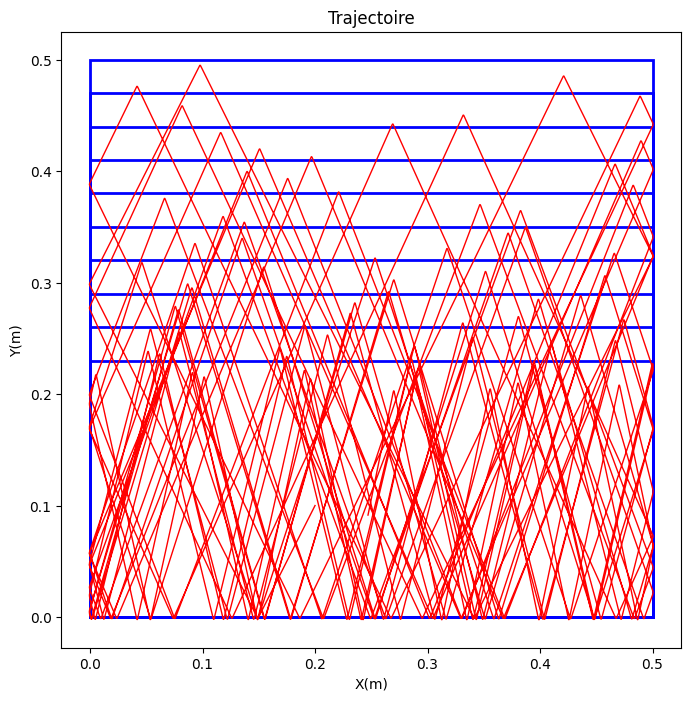

In [4]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.set_xlabel('X(m)')
ax1.set_ylabel('Y(m)')
ax1.plot(X, Y, color='red', lw=1)
ax1.set_title("Trajectoire")

#Tracé de plusieurs rectangles:
intervalle = N//10
for i in range(N):
    if i % intervalle == 0:
        valeur_ac_ymax = (1/2)*perimetre[i] + Xmin + Ymin - Xmax
        if valeur_ac_ymax > 0.05:
            rect1 = Rectangle((0, 0), Xmax, valeur_ac_ymax, linewidth=2, edgecolor='b', facecolor='none')
            ax1.add_patch(rect1)

## Etape 4

Après la sortie de boucle, à partir des évolutions temporelles de Vx, Vy, X et Y, calculer les énergies cinétiques (selon les deux axes), potentielles de contact (selon les deux axes), et totale.


In [5]:
#Energie cinétique
Ec_x = 0.5 * m * Vx**2
Ec_y = 0.5 * m * Vy**2

#Energie potentielle
#Voir avant!

Ec = Ec_x + Ec_y
Ep = Ep_x + Ep_y
Et = Ec + Ep

"""
fig, ax2 = plt.subplots(figsize=(12,12))
ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Energie(J)')
ax2.plot(T, Ec, color='red', lw=1.5, label='Énergie cinétique')
ax2.plot(T, Ep, color='blue', lw=1.5, label='Énergie potentielle')
ax2.plot(T, Et, color='black', lw=1.5, label='Énergie totale', linestyle='-')
plt.legend()
"""

"\nfig, ax2 = plt.subplots(figsize=(12,12))\nax2.set_xlabel('Time(s)')\nax2.set_ylabel('Energie(J)')\nax2.plot(T, Ec, color='red', lw=1.5, label='Énergie cinétique')\nax2.plot(T, Ep, color='blue', lw=1.5, label='Énergie potentielle')\nax2.plot(T, Et, color='black', lw=1.5, label='Énergie totale', linestyle='-')\nplt.legend()\n"

## Etape 5

Créer un postprocesseur permettant de calculer l'évolution de la température et de la pression dans la boîte. Deux possibilités sont envisageables : 
1. Effectuer une moyenne mobile
2. Effectuer des moyennes par sous-intervalles de temps

Puisque vous êtes arrivé(e) jusque là, nous vous laissons explorer ces possibilités.

In [6]:
#-------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------Moyenne mobile:-----------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------
IntervalleMobile = N//2 #intervalle mobile
TemperatureMobile = np.zeros(N+1-IntervalleMobile+1)
PressionMobile = np.zeros(N+1-IntervalleMobile+1)
TempsMobile = np.zeros(N+1-IntervalleMobile+1)
print(N+1-IntervalleMobile+1)
for i in range (N+1-IntervalleMobile+1):
    #Température
    TemperatureMobile[i] = np.mean(Ec[i:i+IntervalleMobile])
    
    #Pression
    pression = (abs(Fx[i:i+IntervalleMobile])+abs(Fy[i:i+IntervalleMobile]))/perimetre[i:i+IntervalleMobile]
    PressionMobile[i] = np.mean(pression)
    
    #Nouveau temps:
    TempsMobile[i] = T[i]

    if i%1000 == 0:
        print(i)

    """
#--------------------------------------------------------------------------------------------------------------------    
#------------------------------------Sous-intervalles de temps:-----------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------
SousIntervalle = 1000 #1000 dt et pas s'endetter
SousTemperature = np.zeros(N+1//SousIntervalle)
SousPression = np.zeros(N+1//SousIntervalle)
SousTemps = np.zeros(N+1//SousIntervalle)
j = 0 #incrément pour les nouveaux tableaux pressions et temperatures
for i in range(0, N+1, SousIntervalle):
    #Température
    Ec_moy_cu = Ec[i:i+SousIntervalle]
    SousTemperature[j] = np.mean(Ec_moy_cu)
    
    #Préssion
    pression = (abs(Fx[i:i+SousIntervalle])+abs(Fy[i:i+IntervalleMobile]))/perimetre[i:i+SousIntervalle]
    SousPression[j] = (Fx_moy_cu + Fy_moy_cu)/Perimetre_moy_cu
    
    #Nouveau temps:
    SousTemps[j] = T[i]
    
    j += 1
    """

1500002
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000

KeyboardInterrupt: 

## Etape 6

Sorties graphiques : Tracer les variables Pression et Température en fonction du temps

'\nfig3, ax3 = plt.subplots(figsize=(10, 10))\nax3.set_ylabel(\'Temperature(K)\')\nax3.set_xlabel(\'Temps(s)\')\nax3.plot(SousTemps, SousTemperature, color=\'red\', lw=1)\nax3.set_title("Evolution de la température au cours du temps(sous-intervalle de temps)")\n\nfig4, ax4 = plt.subplots(figsize=(10, 10))\nax4.set_ylabel(\'Pression(Pa)\')\nax4.set_xlabel(\'Temps(s)\')\nax4.plot(SousTemps, SousPression, color=\'blue\', lw=1)\nax4.set_title("Evolution de la pression au cours du temps(sous-intervalle de temps)")\n'

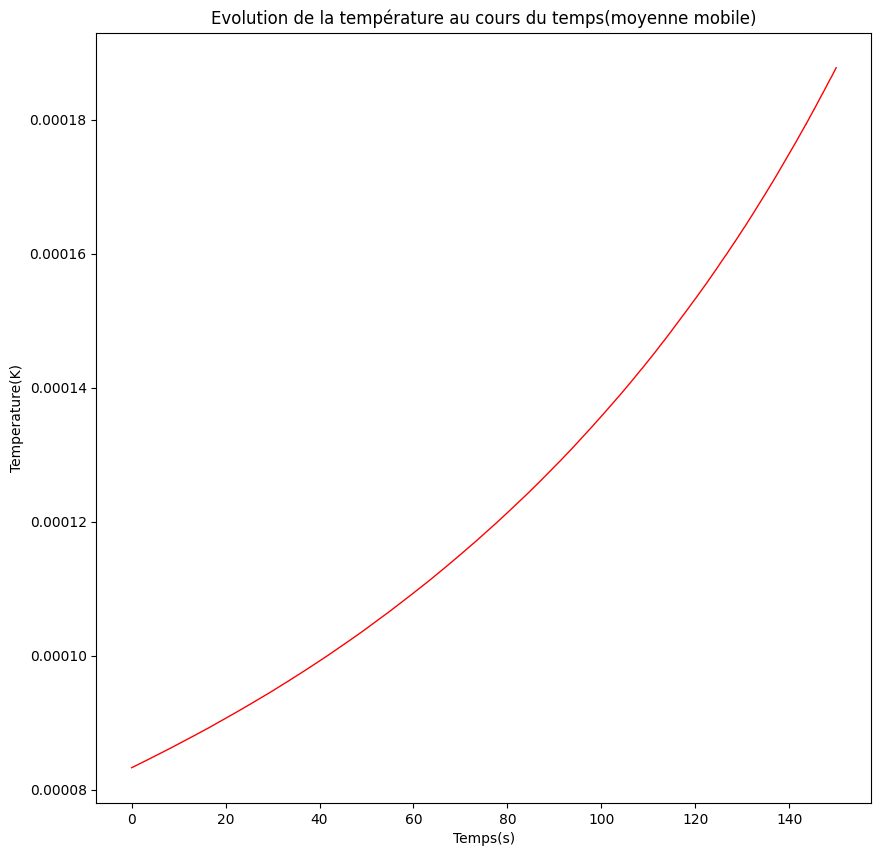

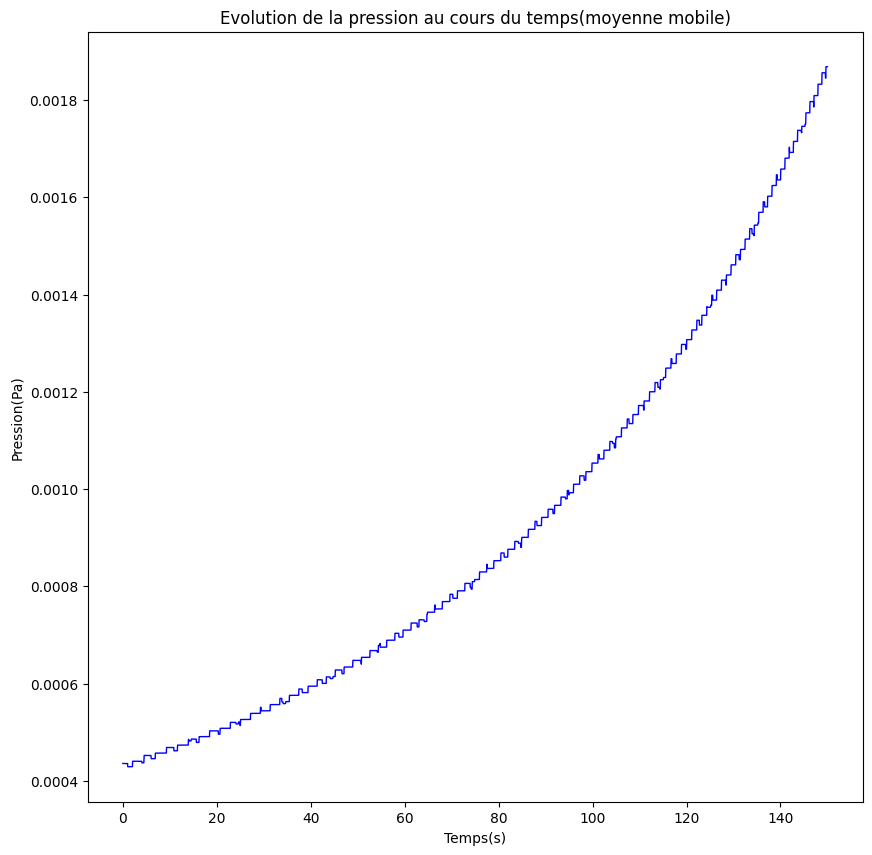

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.set_ylabel('Temperature(K)')
ax1.set_xlabel('Temps(s)')
ax1.plot(TempsMobile, TemperatureMobile, color='red', lw=1)
ax1.set_title("Evolution de la température au cours du temps(moyenne mobile)")

fig2, ax2 = plt.subplots(figsize=(10, 10))
ax2.set_ylabel('Pression(Pa)')
ax2.set_xlabel('Temps(s)')
ax2.plot(TempsMobile, PressionMobile, color='blue', lw=1)
ax2.set_title("Evolution de la pression au cours du temps(moyenne mobile)")

"""
fig3, ax3 = plt.subplots(figsize=(10, 10))
ax3.set_ylabel('Temperature(K)')
ax3.set_xlabel('Temps(s)')
ax3.plot(SousTemps, SousTemperature, color='red', lw=1)
ax3.set_title("Evolution de la température au cours du temps(sous-intervalle de temps)")

fig4, ax4 = plt.subplots(figsize=(10, 10))
ax4.set_ylabel('Pression(Pa)')
ax4.set_xlabel('Temps(s)')
ax4.plot(SousTemps, SousPression, color='blue', lw=1)
ax4.set_title("Evolution de la pression au cours du temps(sous-intervalle de temps)")
"""

## Etape 7

Commentez vos observations.

## Réponse :

#####  L'énergie globale du système augmente lorsqu'on comprime l'espace. C'est l'inverse qui se passe quand on détend le piston. Faire attention au valeur de raideur et de pas de temps au vu de l'activité du système lorsque la boite devient petit... La vitesse augmente et les impacts s'intensifient autant en nombre qu'en puissance. Euler et Verlet présentent les mêmes écart que pour MP1_C. La température diminue  lors des impacts et la pression augmente au même moment... J'aurais d'autres remarques très intéressantes à faire mais je n'ai plus le temps...

In [ ]:
%matplotlib inline
%matplotlib inline
%matplotlib notebook
%matplotlib notebook
#Moi animation:
fig = plt.figure(figsize=(10, 10))
valeur_ac_ymax = (1/2)*perimetre[0] + Xmin + Ymin - Xmax
ax = fig.add_subplot(xlim=(-0.05, Xmax+0.05), ylim=(-0.1, valeur_ac_ymax+0.05))

particule, = ax.plot([],[],'ro') 

#On accelere le baille:
coeff_acceleration = 100
X_new = np.zeros(N+1//coeff_acceleration +1)
Y_new = np.zeros(N+1//coeff_acceleration +1)
perimetre_new = np.zeros(N+1//coeff_acceleration +1)
j = 0
for i in range(N+1):
    if i%coeff_acceleration == 0:
        X_new[j] = X[i]
        Y_new[j] = Y[i]
        perimetre_new[j] = perimetre[i]
        j+=1

X_new[-1] = X[-1]
Y_new[-1] = Y[-1]
perimetre_new[-1] = perimetre[-1]


#Rectangle:
valeur_ac_ymax = (1/2)*perimetre[0] + Xmin + Ymin - Xmax
rect = Rectangle((0, 0), Xmax, valeur_ac_ymax, linewidth=2, edgecolor='b', facecolor='none')
ax.add_patch(rect)
        
# fonction pour l'animation 
def anim_pendule(i):
    valeur_ac_ymax = (1/2)*perimetre_new[i] + Xmin + Ymin - Xmax
    rect.set_xy((Xmin, Ymin))
    rect.set_width(Xmax)
    rect.set_height(valeur_ac_ymax)
    particule.set_data([X_new[i],Y_new[i]])
    return particule, rect,


anim = animation.FuncAnimation(
    fig, anim_pendule, frames=N//coeff_acceleration +1, interval=10, blit=True)
plt.show()

<IPython.core.display.Javascript object>